In [144]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [159]:
treatments = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o','^','s','D']
colors = ['red','blue','green','black']

In [106]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("data","mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(clinical,mouse, on='Mouse ID',how='left')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [107]:
tumors = df.groupby(['Drug','Timepoint'])\
                .agg({'Tumor Volume (mm3)':['mean','sem']})\
                .reset_index(['Drug','Timepoint'])
tumors.columns = tumors.columns.map('_'.join)
tumors = tumors.rename(columns={'Drug_':'Drug',
                                'Timepoint_':'Timepoint',
                                'Tumor Volume (mm3)_mean':'Mean Volume',
                                'Tumor Volume (mm3)_sem':'SEM Volume'
})
tumors.head()

,Drug,Timepoint,Mean Volume,SEM Volume
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [108]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumors['Mean Volume'].head()

0    45.000000
1    44.266086
2    43.084291
3    42.064317
4    40.716325
Name: Mean Volume, dtype: float64

In [109]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumors['SEM Volume'].head()

0    0.000000
1    0.448593
2    0.702684
3    0.838617
4    0.909731
Name: SEM Volume, dtype: float64

In [110]:
tumor_means = tumors.pivot('Timepoint','Drug','Mean Volume')
tumor_means

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


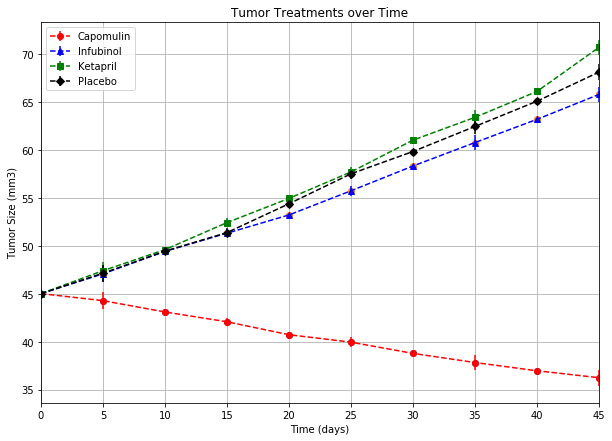

In [160]:
for i in range(len(treatments)):
    plt.scatter(tumor_means.index,tumor_means[treatments[i]])
    tumor_means[treatments[i]].plot(yerr=tumors['SEM Volume'],figsize=(10,7),linestyle='--',marker = markers[i],color=colors[i])
plt.title('Tumor Treatments over Time')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Size (mm3)')
plt.legend()
plt.grid()
plt.show()

## Metastatic Response to Treatment

In [113]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic = df.groupby(['Drug','Timepoint'])\
                .agg({'Metastatic Sites':['mean','sem']})\
                .reset_index(['Drug','Timepoint'])
metastatic.columns = metastatic.columns.map('_'.join)
metastatic = metastatic.rename(columns={'Drug_':'Drug',
                                'Timepoint_':'Timepoint',
                                'Metastatic Sites_mean':'Mean Sites',
                                'Metastatic Sites_sem':'SEM Sites'
                                   })
# Preview DataFrame
metastic.head()

,Drug,Timepoint,Mean Sites,SEM Sites
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


In [114]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic['Mean Sites'].head()

0    0.000000
1    0.160000
2    0.320000
3    0.375000
4    0.652174
Name: Mean Sites, dtype: float64

In [137]:
metastatic['SEM Sites'].head()

0    0.000000
1    0.074833
2    0.125433
3    0.132048
4    0.161621
Name: SEM Sites, dtype: float64

In [115]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
metastatic_means = metastatic.pivot('Timepoint','Drug','Mean Sites')
metastatic_means.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


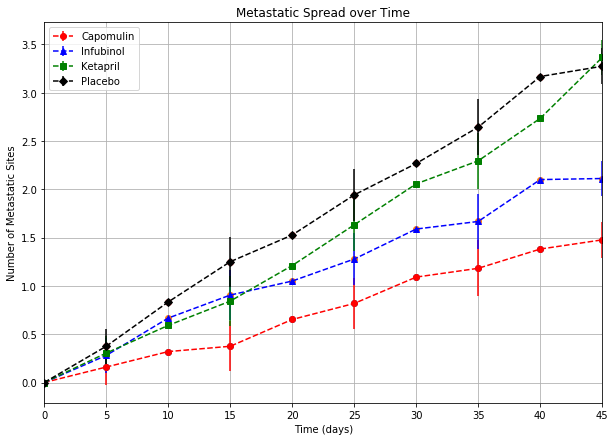

In [161]:
for i in range(len(treatments)):
    plt.scatter(metastatic_means.index,metastatic_means[treatments[i]])
    metastatic_means[treatments[i]].plot(yerr=metastic['SEM Sites'],figsize=(10,7),linestyle='--',marker = markers[i],color=colors[i])
plt.title('Metastatic Spread over Time')
plt.xlabel('Time (days)')
plt.ylabel('Number of Metastatic Sites')
plt.legend()
plt.grid()
plt.show()

## Survival Rates

In [69]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = df.groupby(['Drug','Timepoint'])\
                .agg({'Mouse ID':'count'})\
                .reset_index(['Drug','Timepoint'])
# Preview DataFrame
survival.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [70]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
survival_rates = survival.pivot('Timepoint','Drug','Mouse ID')
survival_rates

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [71]:
for c in survival_rates.columns:
    survival_rates[c] = survival_rates[c].apply(lambda x : (x/survival_rates[c][0])*100)
survival_rates

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


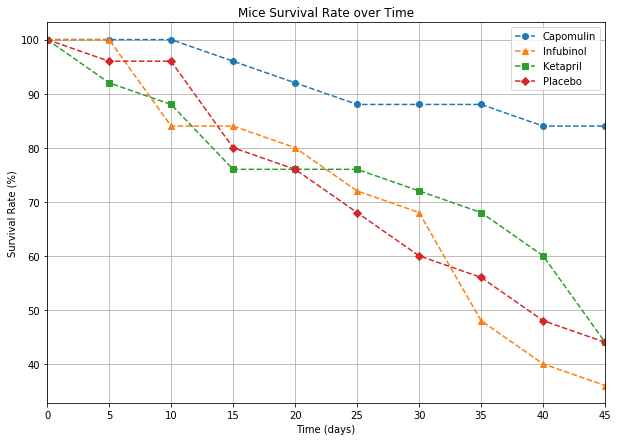

In [164]:
# Generate the Plot (Accounting for percentages)
survival_rates[treatments].plot(figsize=(10,7), style=['o--','^--','s--','D--'])
plt.title('Mice Survival Rate over Time')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.grid()
plt.show()

## Summary Bar Graph

In [74]:
#Set index to Mouse ID and Timepoint to identify start and final tumor volumes
vol_changes = tumor_means.transpose()[[0,45]]
vol_changes['% Volume Changes'] = ((vol_changes[45]-vol_changes[0])/vol_changes[0])*100
vol_changes

Timepoint,0,45,% Volume Changes
Drug,,,
Capomulin,45.0,36.236114,-19.475303
Ceftamin,45.0,64.132421,42.516492
Infubinol,45.0,65.755562,46.123472
Ketapril,45.0,70.662958,57.028795
Naftisol,45.0,69.265506,53.923347
Placebo,45.0,68.084082,51.297960
Propriva,45.0,66.258529,47.241175
Ramicane,45.0,34.955595,-22.320900
Stelasyn,45.0,68.438310,52.085134


In [80]:
summary = vol_changes.loc[treatments]
summary

Timepoint,0,45,% Volume Changes
Drug,,,
Capomulin,45.0,36.236114,-19.475303
Infubinol,45.0,65.755562,46.123472
Ketapril,45.0,70.662958,57.028795
Placebo,45.0,68.084082,51.297960


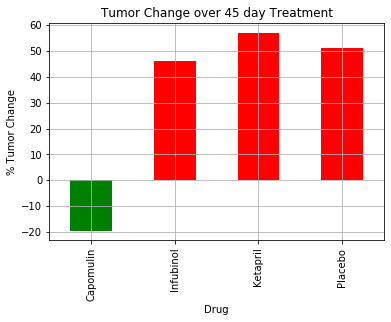

In [182]:
# Splice the data between passing and failing drugs
colors = ['g' if e < 0 else 'r' for e in summary['% Volume Changes']]
summary['% Volume Changes'].plot(kind='bar', color = colors)
# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor Change over 45 day Treatment')
plt.ylabel('% Tumor Change')
plt.grid()
plt.show()